<a href="https://colab.research.google.com/github/yavuzuzun/projects/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic regression is a type of binary classification algorithm used to predict the probability of an event occurring (i.e., a binary outcome) based on a set of predictor variables. The outcome variable is modeled as a function of the predictor variables, using a logistic function (also called a sigmoid function), which maps any real-valued input to a value between 0 and 1.

The logistic function has the following form: P(y=1|x; $\theta$ ) = Sigmoid(β * x) = (1 + exp(- β * x))^-1
​
 

where $x$ is the input feature vector, $\theta$ is the vector of parameters to be estimated, and $y$ is the binary outcome variable. The logistic function converts the linear combination of predictor variables and parameters into a probability value between 0 and 1.

To estimate the parameters $\theta$, maximum likelihood estimation (MLE) is commonly used. MLE involves finding the parameters that maximize the likelihood of observing the given data, assuming a certain statistical model. In the case of logistic regression, the likelihood function is a product of Bernoulli distributions (one for each observation), and the optimal parameter values are found by maximizing the log-likelihood function. This can be done using numerical optimization methods, such as gradient descent or Newton-Raphson method.

Once the parameters are estimated, the logistic regression model can be used to predict the probability of the binary outcome for new input data. A decision threshold is typically applied to classify the binary outcome as 0 or 1, based on whether the predicted probability is above or below the threshold. The threshold can be chosen based on a trade-off between sensitivity and specificity, depending on the problem and application.

# From scratch

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, num_iters=1000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iters = num_iters
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iters):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)

            if self.verbose and i % 100 == 0:
                print(f'Loss at iteration {i}: {loss}')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold


Here, LogisticRegression is a class that takes the following parameters:

lr: learning rate for gradient descent (default 0.01)
num_iters: number of iterations for gradient descent (default 1000)
fit_intercept: whether to fit an intercept term or not (default True)
verbose: whether to print loss at each iteration (default False)
The class has the following methods:

__add_intercept: adds an intercept term to the input X matrix
__sigmoid: computes the sigmoid function on the input z
__loss: computes the logistic loss function
fit: fits the logistic regression model to the input X and y data using gradient descent
predict_prob: predicts the probability of a positive label for the input X data
predict: predicts the labels for the input X data using a given threshold (default 0.5)
Here is an example of using this implementation on a toy dataset:

Loss at iteration 0: 0.6693937401793881
Loss at iteration 100: 0.14425478753701196
Loss at iteration 200: 0.08618723918423622
Loss at iteration 300: 0.06325306166724406
Loss at iteration 400: 0.05065407521852452
Loss at iteration 500: 0.042573540823999494
Loss at iteration 600: 0.036900005077692435
Loss at iteration 700: 0.03267217930129186
Loss at iteration 800: 0.02938596942567051
Loss at iteration 900: 0.02675000597194004
Loss at iteration 1000: 0.024583416084483167
Loss at iteration 1100: 0.022767609404320748
Loss at iteration 1200: 0.021221392539610175
Loss at iteration 1300: 0.019887188438316418
Loss at iteration 1400: 0.018722961533598755
Loss at iteration 1500: 0.017697261218649528
Loss at iteration 1600: 0.01678605872925217
Loss at iteration 1700: 0.01597066065245458
Loss at iteration 1800: 0.015236292858337946
Loss at iteration 1900: 0.014571115323126571
Loss at iteration 2000: 0.013965521645077547
Loss at iteration 2100: 0.013411631289005466
Loss at iteration 2200: 0.0129029

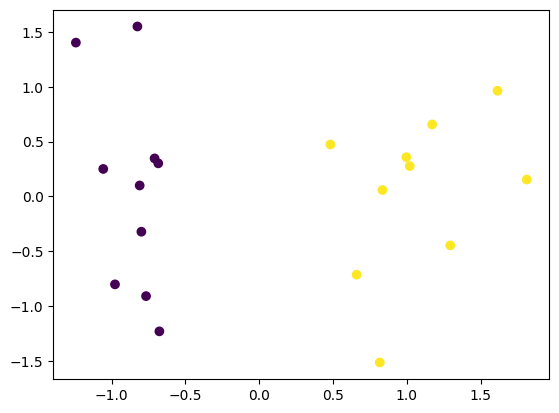

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(lr=0.1, num_iters=5000, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()
